In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Linear Regression/DATA/mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
X = pd.get_dummies(df.drop('class' , axis=1) , drop_first=True)
y = df['class']
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.15 , random_state = 101)

In [5]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1)
ada.fit(x_train , y_train)
y_pred = ada.predict(x_test)

In [7]:
ada.feature_importances_.argmax()

22

In [8]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

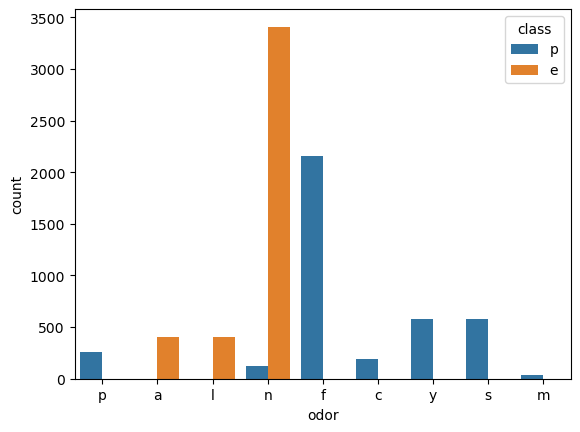

In [13]:
sns.countplot(data=df , x='odor' , hue='class')

In [14]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [16]:
err_array = []
for i in range(1,96):
    mod = AdaBoostClassifier(n_estimators=i)
    mod.fit(x_train , y_train)
    pred = mod.predict(x_test)
    err_array.append(1 - accuracy_score(y_test , pred))


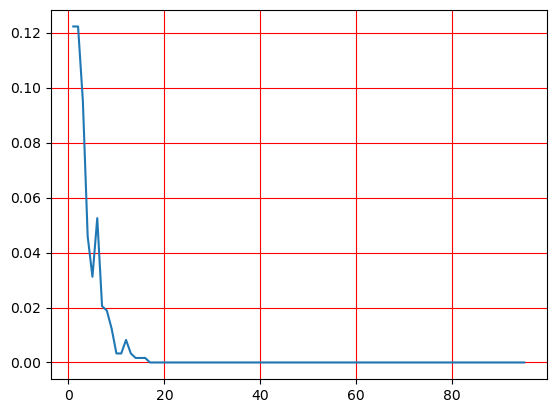

In [40]:
plt.plot(range(1,96) ,  err_array)
plt.grid(which='both',color='red')

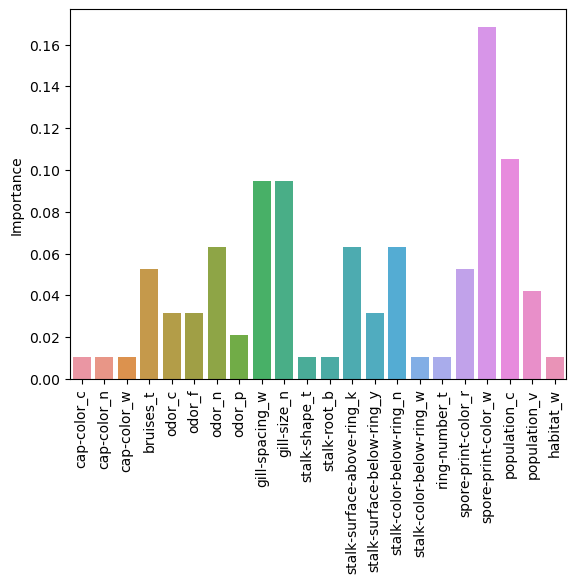

In [50]:
imp_features = pd.DataFrame(data = mod.feature_importances_ , index=X.columns , columns=['Importance'])
imp_features = imp_features[imp_features['Importance']>0]
sns.barplot(data = imp_features , x=imp_features.index , y='Importance' )
plt.xticks(rotation=90);

In [19]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [30]:
adaModel = AdaBoostClassifier(n_estimators=12)
adaModel.fit(x_train , y_train)
best_pred = adaModel.predict(x_test)
print(classification_report(y_test , best_pred))

              precision    recall  f1-score   support

           e       0.99      0.99      0.99       655
           p       0.99      0.99      0.99       564

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219



In [41]:
adaModel.feature_importances_.argmax()

82

In [42]:
X.columns[82]

'spore-print-color_w'

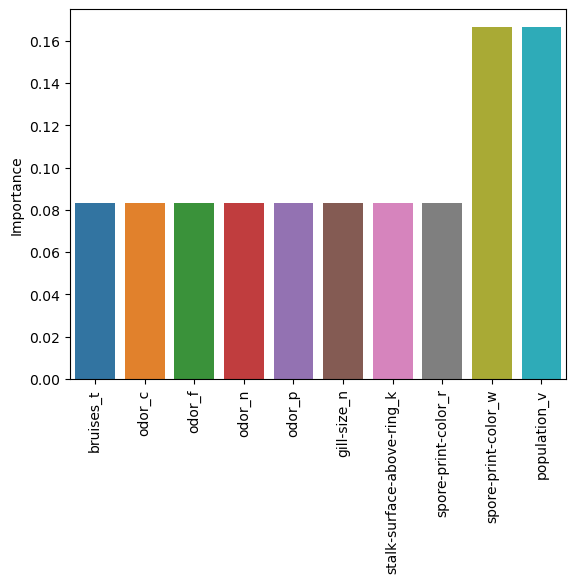

In [48]:
imp_features = pd.DataFrame(data = adaModel.feature_importances_ , index=X.columns , columns=['Importance'])
imp_features = imp_features[imp_features['Importance']>0]
sns.barplot(data = imp_features , x=imp_features.index , y='Importance' )
plt.xticks(rotation=90);

In [52]:
adaModel = AdaBoostClassifier(n_estimators=13)
adaModel.fit(x_train , y_train)
best_pred = adaModel.predict(x_test)
print(classification_report(y_test , best_pred))

              precision    recall  f1-score   support

           e       0.99      1.00      1.00       655
           p       1.00      0.99      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [53]:
adaModel = AdaBoostClassifier(n_estimators=18)
adaModel.fit(x_train , y_train)
best_pred = adaModel.predict(x_test)
print(classification_report(y_test , best_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [ ]:
# with 13 its a 100% accuracy 